In [4]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np
import nibabel as nib
from nilearn.input_data import NiftiMasker,  MultiNiftiMasker
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
%matplotlib inline 
%autosave 30
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})
sns.set(palette="colorblind")
import nitime

# Import the time-series objects:
from nitime.timeseries import TimeSeries

# Import the analysis objects:
from nitime.analysis import SpectralAnalyzer, FilterAnalyzer, NormalizationAnalyzer


Autosaving every 30 seconds


In [5]:
img = nib.load("./nd/sfnwmrda0010001_session_1_rest_1.nii")

In [6]:
img.shape

(49, 58, 47, 172)

In [7]:
first_vol = img.get_data()[:, :, :, 0]

In [8]:
first_vol.shape

(49, 58, 47)

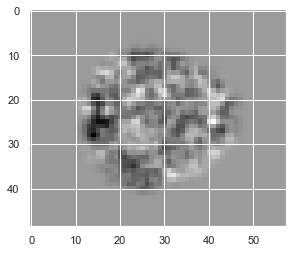

In [9]:
plt.imshow(first_vol[:, :, 30], cmap='gray')

In [10]:
def make_voxel_time_series (x,y,z,img):
    f, ax = plt.subplots(1,1, figsize=(14,5))
    ax.plot(img.get_data()[x,y,z,:])

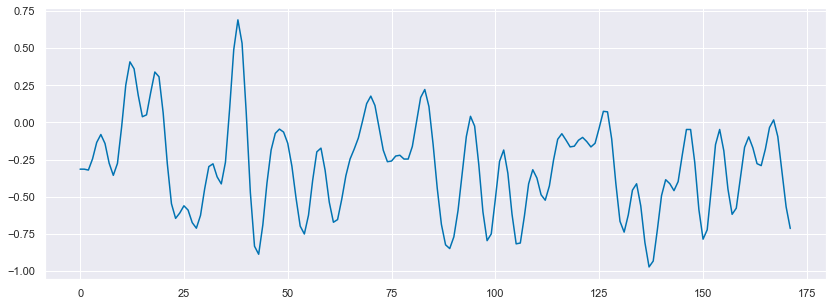

In [11]:
make_voxel_time_series(20,20,20,img)

In [12]:
img.shape[3]

172

In [13]:
import re
z = re.match("^[a-z]*([0-9]*).*$",'sfnwmrda0010001_session_1_rest_1.nii')
z.groups()[0]

'0010001'

In [14]:
img.shape

(49, 58, 47, 172)

In [15]:
new = img.slicer[..., :140]

In [16]:
new.shape

(49, 58, 47, 140)

In [17]:
new2 = img.slicer[..., :172]

In [18]:
new2.shape

(49, 58, 47, 172)

In [19]:
new3 = img.slicer[..., 0:]

In [20]:
new3.shape


(49, 58, 47, 172)

In [21]:
np.empty(0)

array([], dtype=float64)

In [22]:
np.append(2)

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [46]:
from statistics import mean
a = [[240, 240, 239],
     [250, 249, 237], 
     [242, 239, 237],
     [240, 234, 233]]
l = list(map(mean, zip(*a)))

In [54]:
import operator
f = [1,2,3,4,5,89]
g = [1,2,3,4,5,0]
map_object = map(operator.sub, f, g)
r = list(map_object)
r

[0, 0, 0, 0, 0, 89]